In [69]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [22]:
#reading the file
data=pd.read_csv('messages.csv')
data

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


0    2412
1     481
Name: label, dtype: int64


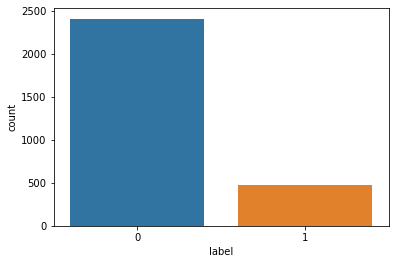

In [70]:
sns.countplot(data['label'])
print(data['label'].value_counts())

In [60]:
!pip install wordcloud

In [23]:
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sachin
[nltk_data]     Koli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [26]:
c=[]
for i in range(0,len(data)):
    clean1=re.sub('[^a-zA-Z]',' ',str(data['subject'][i]))
    clean1=clean1.lower()
    clean1=clean1.split()
    clean2=re.sub('[^a-zA-Z]',' ',str(data['message'][i]))
    clean2=clean2.lower()
    clean2=clean2.split()
    clean=clean1+clean2
    
    clean=[PorterStemmer().stem(word) for word in clean if not word in stopwords.words('english')]
    clean=' '.join(clean)
    c.append(clean)

In [27]:
c

['job post appl iss research center content length appl iss research center us million joint ventur appl comput inc institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state art corpu base n gram languag model cach languag model part speech languag model requir text speech project leader success candid research expertis expertis two follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid phd least year relev work experi technic msc degre least year experienc e strong softwar engin skill includ design implement product requir posit knowledg c c unix prefer unix c programm look experienc unix c programm prefer good industri experi join us brea

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(c).toarray()

In [30]:
y=data['label']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [33]:
print(x_train.shape)

(2314, 2500)


In [34]:
print(y_train.shape)

(2314,)


In [35]:
spam_model=MultinomialNB().fit(x_train,y_train)

In [37]:
predict=spam_model.predict(x_test)

In [38]:
predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for g in list:
    print('for the algorithm: ',g)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)
    g.fit(x_train,y_train)
    pred=g.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    scr=g.score(x_train,y_train)
    pred=g.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    print('The score is: ',scr)
    print('Accuracy score is: ',accuracy)
    print('confusion matrix: \n',confusion_matrix(pred,y_test))
    print('classification report: \n',classification_report(pred,y_test))  

for the algorithm:  LogisticRegression()
The score is:  1.0
Accuracy score is:  0.9942396313364056
confusion matrix: 
 [[721   3]
 [  2 142]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       0.98      0.99      0.98       144

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868

for the algorithm:  GaussianNB()
The score is:  0.9866666666666667
Accuracy score is:  0.945852534562212
confusion matrix: 
 [[711  35]
 [ 12 110]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       746
           1       0.76      0.90      0.82       122

    accuracy                           0.95       868
   macro avg       0.87      0.93      0.90       868
weighted avg       0.95      0.95      0.95       868

for th

In [72]:
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
lg=LogisticRegression()
kn=KNeighborsClassifier()
sc=SVC()

In [73]:
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('DecisionTreeClassifier',dt))
Model.append(('KNeighborsClassifier',kn))
Model.append(('LogisticRegression',lg))
Model.append(('SVC',sc))


RandomForestClassifier 

RandomForestClassifier()


Accuracy Score:  0.988479262672811


F1 Score:  0.9645390070921986
AUC_ROC_Score 0.9682739543091525


[[722   1]
 [  9 136]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       723
           1       0.99      0.94      0.96       145

    accuracy                           0.99       868
   macro avg       0.99      0.97      0.98       868
weighted avg       0.99      0.99      0.99       868



AxesSubplot(0.125,0.808774;0.775x0.0712264)


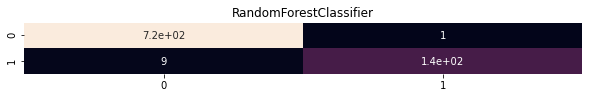

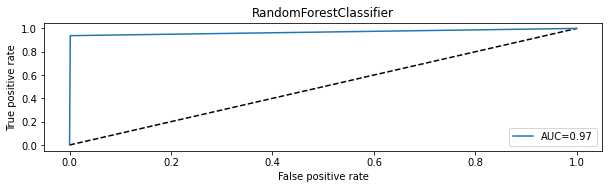



DecisionTreeClassifier 

DecisionTreeClassifier()


Accuracy Score:  0.956221198156682


F1 Score:  0.8707482993197279
AUC_ROC_Score 0.926856488768064


[[702  21]
 [ 17 128]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       723
           1       0.86      0.88      0.87       145

    accuracy                           0.96       868
   macro avg       0.92      0.93      0.92       868
weighted avg       0.96      0.96      0.96       868



AxesSubplot(0.125,0.808774;0.775x0.0712264)


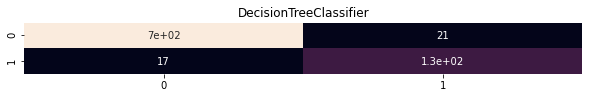

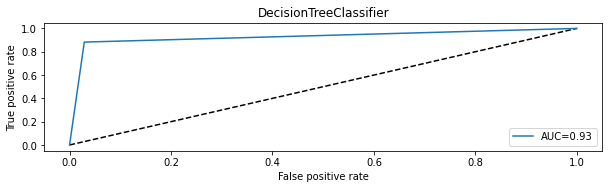



KNeighborsClassifier 

KNeighborsClassifier()


Accuracy Score:  0.978110599078341


F1 Score:  0.9323843416370108
AUC_ROC_Score 0.9482663232699003


[[718   5]
 [ 14 131]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       723
           1       0.96      0.90      0.93       145

    accuracy                           0.98       868
   macro avg       0.97      0.95      0.96       868
weighted avg       0.98      0.98      0.98       868



AxesSubplot(0.125,0.808774;0.775x0.0712264)


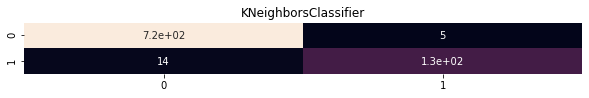

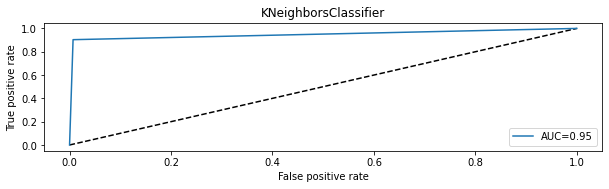



LogisticRegression 

LogisticRegression()


Accuracy Score:  0.9942396313364056


F1 Score:  0.9826989619377162
AUC_ROC_Score 0.9882720465493395


[[721   2]
 [  3 142]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       0.99      0.98      0.98       145

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868



AxesSubplot(0.125,0.808774;0.775x0.0712264)


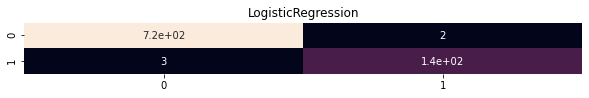

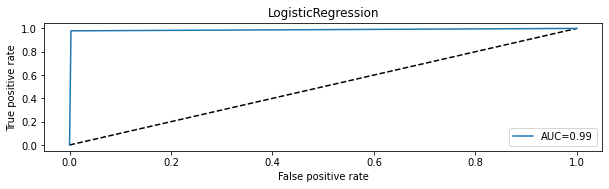



SVC 

SVC()


Accuracy Score:  0.9585253456221198


F1 Score:  0.858267716535433
AUC_ROC_Score 0.8758620689655172


[[723   0]
 [ 36 109]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       723
           1       1.00      0.75      0.86       145

    accuracy                           0.96       868
   macro avg       0.98      0.88      0.92       868
weighted avg       0.96      0.96      0.96       868



AxesSubplot(0.125,0.808774;0.775x0.0712264)


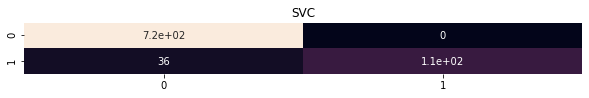

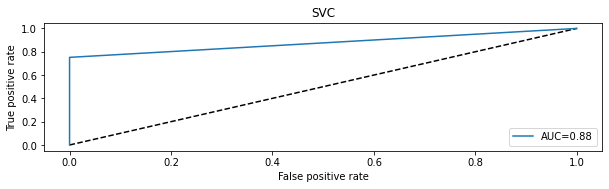

In [75]:
Models=[]
Score=[]
Roc_Score=[]
F1=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Accuracy Matrix
    a=accuracy_score(y_test,pred)
    print('Accuracy Score: ',a)
    Score.append(a*100)
    print('\n')
    
# F1 Score
    f=f1_score(y_test,pred)
    print('F1 Score: ',f)
    F1.append(f)
    
# ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Roc_Score.append(roc_auc*100)
    print("\n")
    
#Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
#Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
#Confusion Matrix using Heatmap
    plt.figure(figsize=(10,10))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False))
    plt.show()
    print('\n')
    
#Auc_Roc_curve
    plt.figure(figsize=(10,25))
    plt.subplot(911)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [40]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [41]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       472
           1       0.96      0.94      0.95       107

    accuracy                           0.98       579
   macro avg       0.97      0.97      0.97       579
weighted avg       0.98      0.98      0.98       579



In [42]:
print(confusion_matrix(predict,y_test))

[[468   4]
 [  6 101]]


In [44]:
print(accuracy_score(predict,y_test))

0.9827288428324698


In [46]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,f1_score


In [49]:
Roc_Score=[]

false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print("AUC_ROC_Score",roc_auc)
Roc_Score.append(roc_auc*100)
print("\n")

AUC_ROC_Score 0.9746232670283305




In [51]:
import matplotlib.pyplot as plt

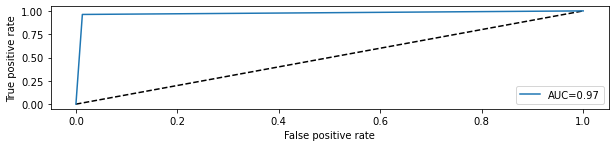

In [61]:
plt.figure(figsize=(10,20))
plt.subplot(911)
plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()
print('\n')

In [76]:
#Saving the best model Random Forest Classifier with best parameters.
import joblib
joblib.dump(lg,'emailspam_detection.pkl')


['emailspam_detection.pkl']